# **Clustering** - 🗺️ Climate Change Indicators
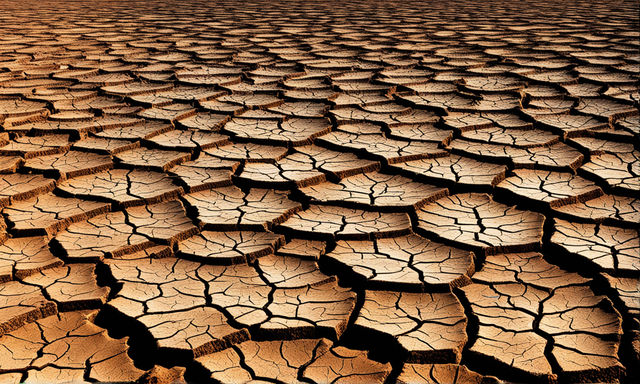

In [1]:
# Packages
# Data Processing
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
# Statistics
import math
from scipy import stats
from scipy.stats import norm
# File Path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-indicators/climate_change_indicators.csv


In [2]:
# version check
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")

numpy version: 1.26.3
pandas version: 2.2.0


In [3]:
# Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [4]:
# setting
path_root = "/kaggle/input/"
seed = 394

In [5]:
# pandas display setting
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 200)

In [6]:
df_climate = pd.read_csv(path_root + "climate-change-indicators/climate_change_indicators.csv")

# 1. Data Cleaning

In [7]:
# subsetting
df_climate = df_climate[[
#     'ObjectId', 
    'Country', 
#     'ISO2', 
    'ISO3', 
#     'Indicator', 'Unit', 'Source',
#     'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor', 
    'F1961', 'F1962',
    'F1963', 'F1964', 'F1965', 'F1966', 'F1967', 'F1968', 'F1969', 'F1970',
    'F1971', 'F1972', 'F1973', 'F1974', 'F1975', 'F1976', 'F1977', 'F1978',
    'F1979', 'F1980', 'F1981', 'F1982', 'F1983', 'F1984', 'F1985', 'F1986',
    'F1987', 'F1988', 'F1989', 'F1990', 'F1991', 'F1992', 'F1993', 'F1994',
    'F1995', 'F1996', 'F1997', 'F1998', 'F1999', 'F2000', 'F2001', 'F2002',
    'F2003', 'F2004', 'F2005', 'F2006', 'F2007', 'F2008', 'F2009', 'F2010',
    'F2011', 'F2012', 'F2013', 'F2014', 'F2015', 'F2016', 'F2017', 'F2018',
    'F2019', 'F2020', 'F2021', 'F2022'
]].copy()

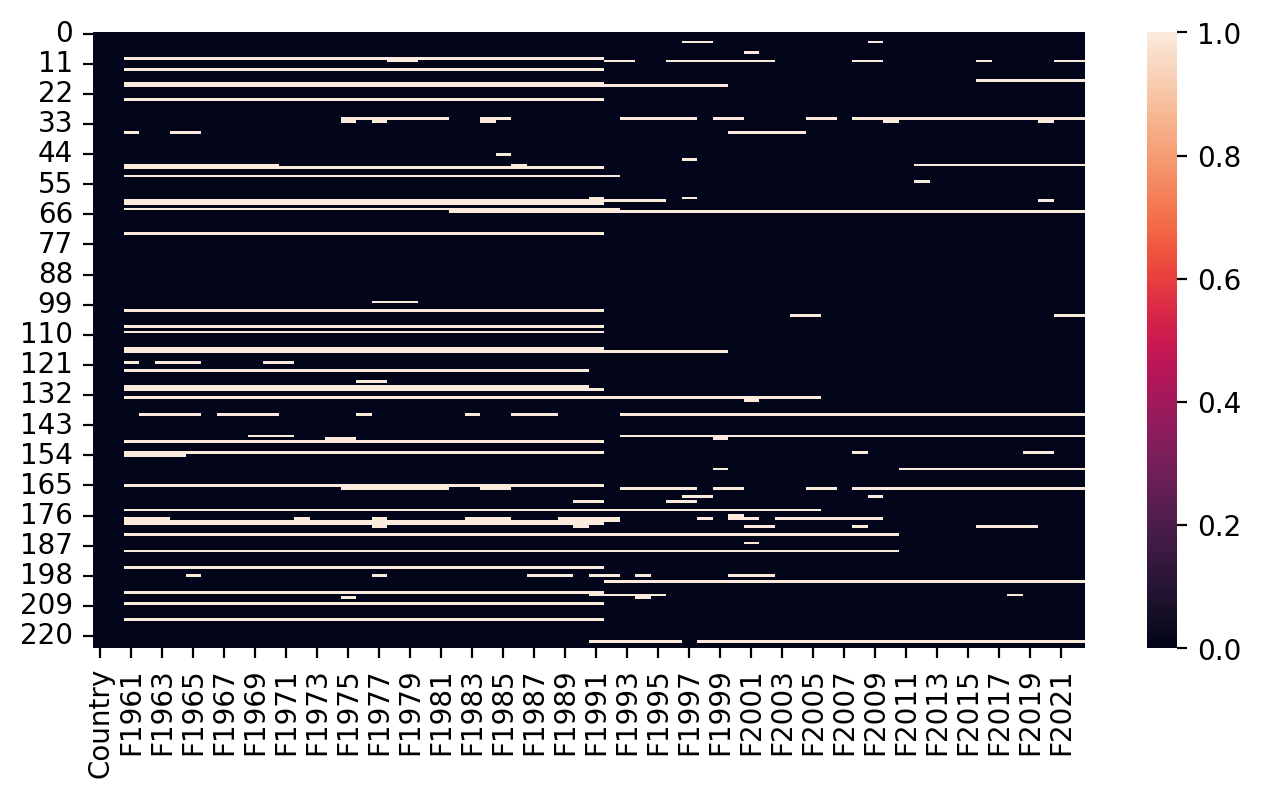

In [8]:
plt.figure(figsize = (8, 4), facecolor = "white")

sns.heatmap(
    df_climate.isnull(), vmin = 0, vmax = 1
)

plt.show()

In [9]:
df_climate.isnull().sum()[[
    'F1990', 'F1991', 'F1992', 'F1993'
]]

F1990    36
F1991    37
F1992    17
F1993    16
dtype: int64

There is a significant difference in the number of missing rows around 1992.

In [10]:
df_climate_dim = df_climate[[
    'Country', 'ISO3', 
    'F1992', 'F2002', 'F2012', 'F2022'
]]
df_climate_dim.head()

,Country,ISO3,F1992,F2002,F2012,F2022
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012
1,Albania,ALB,0.106,0.492,1.487,1.518
2,Algeria,DZA,-0.312,1.258,1.147,1.688
3,American Samoa,ASM,0.344,1.152,0.924,1.256
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243


In [11]:
df_climate_dim = df_climate_dim.dropna().reset_index(drop = True).copy()

# 2. Clustering

In [12]:
from sklearn.cluster import KMeans

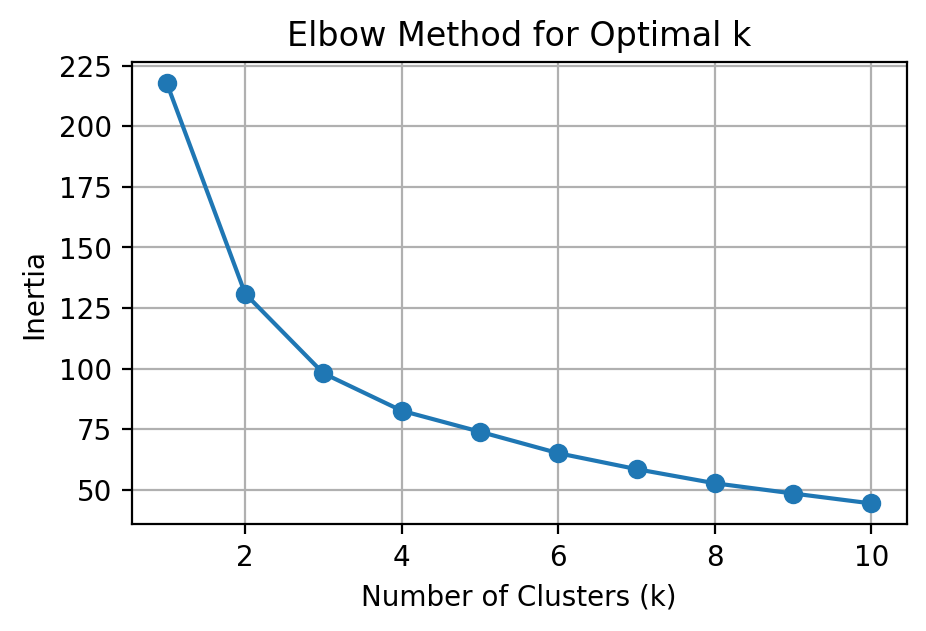

In [13]:
# select the columns for clustering
X = df_climate_dim.iloc[:, 2:]

# list to store the inertia values
list_inertia = []

# range of cluster numbers
k_range = range(1, 11)

# calculate inertia
for k in k_range:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 84)
    kmeans.fit(X)
    list_inertia.append(kmeans.inertia_)

# plotting
plt.figure(figsize = (5, 3), facecolor = "white")
plt.plot(k_range, list_inertia, marker = 'o', linestyle = '-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [14]:
n_clusters = 3

# clustering
kmeans = KMeans(n_clusters = n_clusters, n_init = 10, random_state = 84)
df_climate_dim['Cluster'] = kmeans.fit_predict(X)

# Display the clustered data
display(df_climate_dim)

,Country,ISO3,F1992,F2002,F2012,F2022,Cluster
0,"Afghanistan, Islamic Rep. of",AFG,-0.294,1.365,0.223,2.012,0
1,Albania,ALB,0.106,0.492,1.487,1.518,1
2,Algeria,DZA,-0.312,1.258,1.147,1.688,0
3,American Samoa,ASM,0.344,1.152,0.924,1.256,1
4,"Andorra, Principality of",AND,0.386,0.835,1.265,3.243,2
...,...,...,...,...,...,...,...
192,West Bank and Gaza,PSE,-1.045,0.728,1.043,1.074,0
193,Western Sahara,ESH,0.529,1.249,1.344,1.970,2
194,World,WLD,0.184,1.021,1.074,1.394,1
195,Zambia,ZMB,0.544,0.711,0.972,0.686,1


# 3. Inspection

## 3.1. Descriptive Statistics

In [15]:
df_climate_dim['Cluster'].value_counts()

Cluster
1    125
2     48
0     24
Name: count, dtype: int64

In [16]:
# table
df_cluster_stats = df_climate_dim.groupby('Cluster').agg({
    'F1992': ['mean', 'std', 'min', 'max'],
    'F2002': ['mean', 'std', 'min', 'max'],
    'F2012': ['mean', 'std', 'min', 'max'],
    'F2022': ['mean', 'std', 'min', 'max']
}).round(3)
display(df_cluster_stats.T)

Cluster         0      1      2
F1992 mean -0.798  0.262  0.705
      std   0.384  0.350  0.457
      min  -1.344 -0.716 -0.059
      max   0.100  1.147  1.601
F2002 mean  1.039  0.740  1.332
      std   0.404  0.224  0.352
      min   0.009  0.017  0.681
      max   1.716  1.380  2.255
F2012 mean  1.178  0.672  1.314
      std   0.459  0.251  0.428
      min  -0.032 -0.128  0.230
      max   2.144  1.487  2.089
F2022 mean  1.636  0.991  2.218
      std   0.415  0.427  0.356
      min   1.040 -1.305  1.405
      max   2.370  1.840  3.243

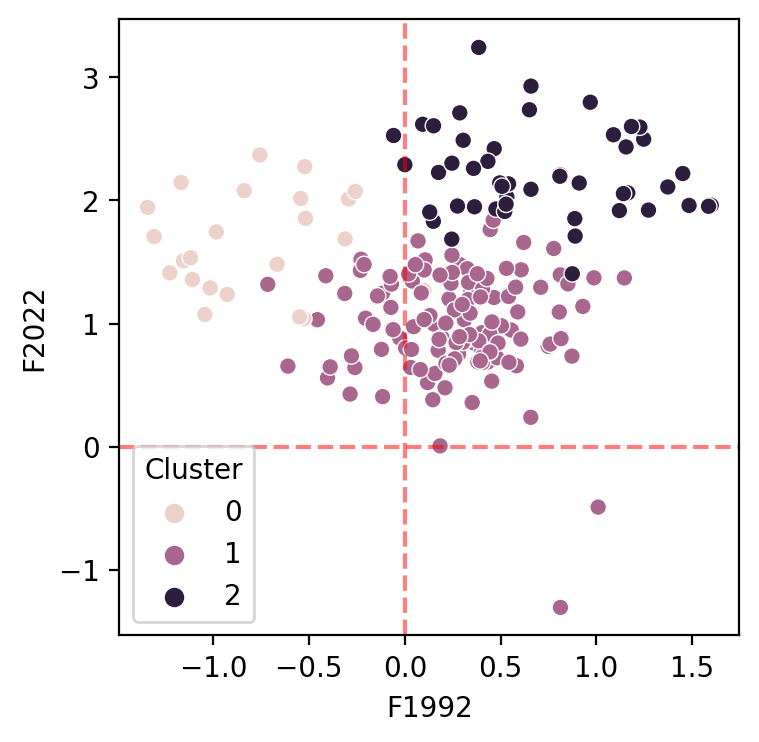

In [17]:
# scatterplot
plt.figure(figsize = (4, 4), facecolor = "white")
sns.scatterplot(
    data = df_climate_dim,
    x = 'F1992', y = 'F2022',
    hue = 'Cluster'
)
plt.axhline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.axvline(
    0, 0, 1,
    color = "red", linestyle = "--", alpha = 0.5
)
plt.show()

## 3.2. Visualization

In [18]:
import geopandas as gpd

In [19]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_world['ISO3'] = df_world['iso_a3']

df_world = pd.merge(df_world, df_climate_dim, on = ['ISO3'], how = 'left') 
df_world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,ISO3,Country,F1992,F2002,F2012,F2022,Cluster
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,"Fiji, Rep. of",0.039,0.720,0.589,1.346,1.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,"Tanzania, United Rep. of",0.338,0.646,0.820,0.911,1.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",ESH,Western Sahara,0.529,1.249,1.344,1.970,2.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,Canada,0.100,0.540,2.144,1.268,0.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,United States,0.395,0.951,1.448,1.217,1.0


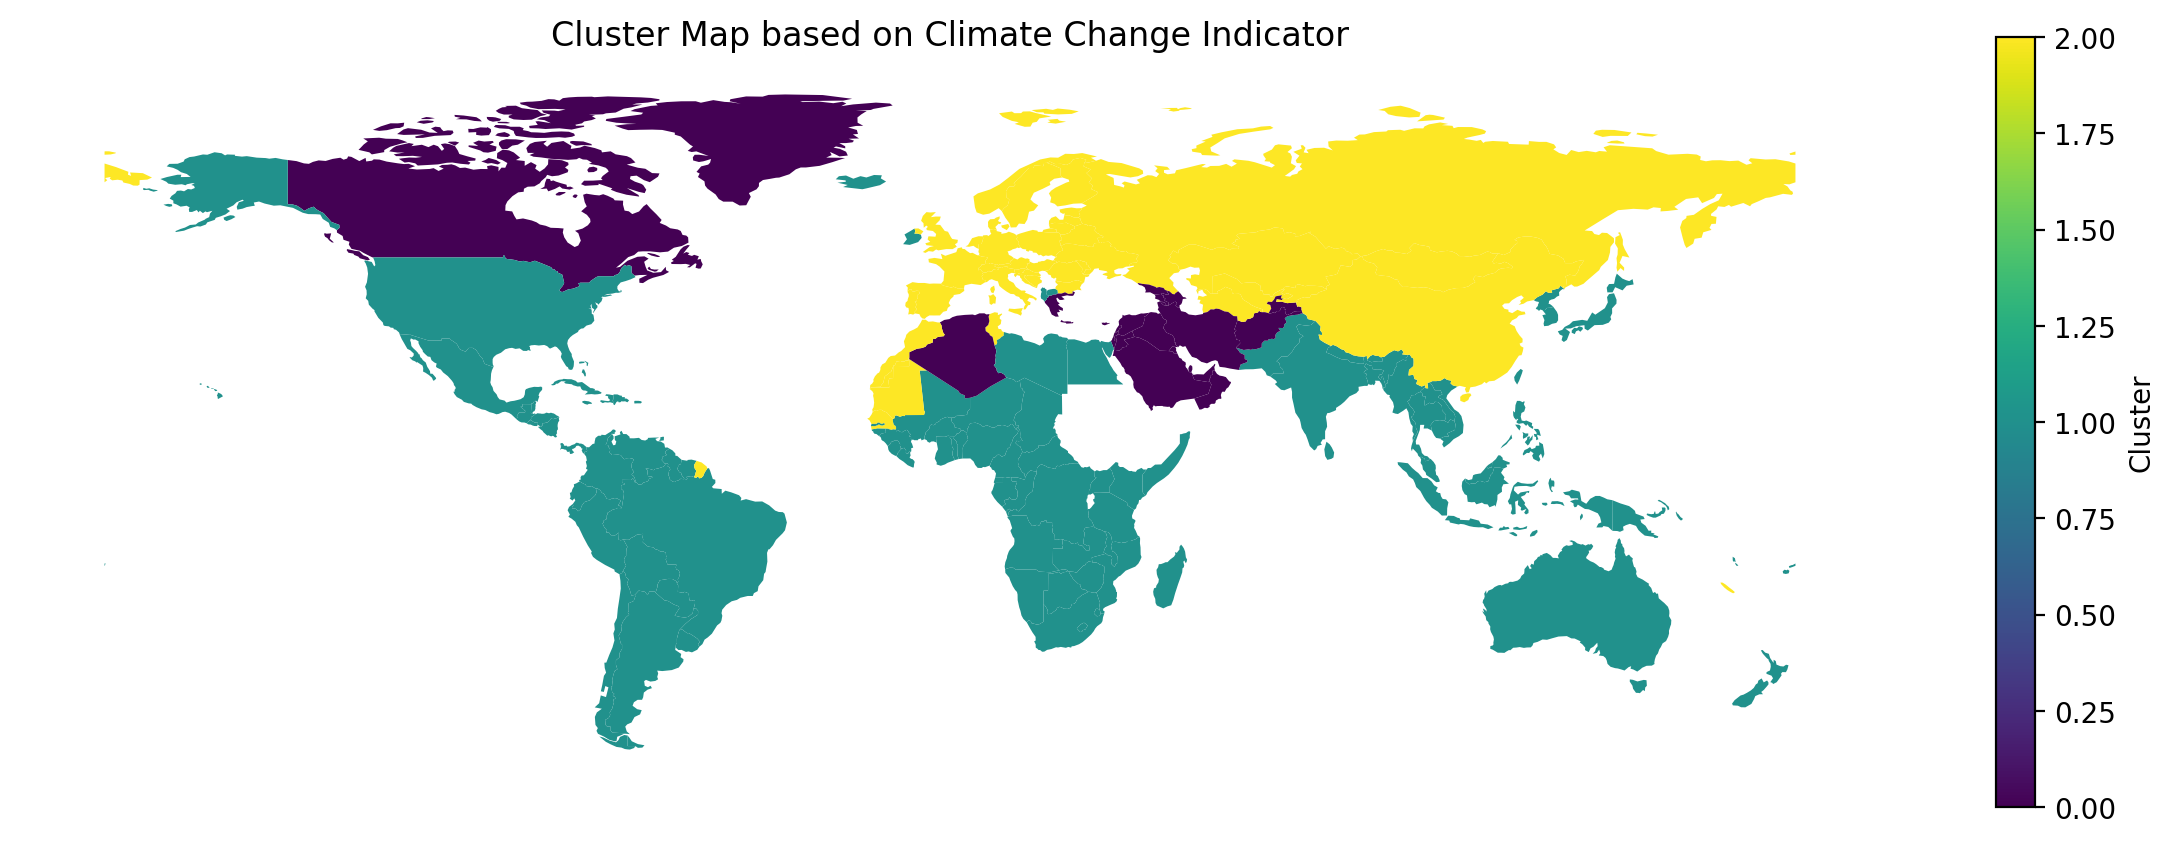

In [20]:
fig, ax = plt.subplots(figsize = (15, 5), facecolor = "white")
df_world.plot(
    column = df_world['Cluster'], ax = ax,
    legend = True,
    legend_kwds = {
        'label': "Cluster"
    }
)
ax.set_axis_off()
ax.set_title("Cluster Map based on Climate Change Indicator")
plt.show()

In [21]:
print(list(df_climate_dim.query("Cluster == 0")['Country']))

['Afghanistan, Islamic Rep. of', 'Algeria', 'Armenia, Rep. of', 'Azerbaijan, Rep. of', 'Bahrain, Kingdom of', 'Canada', 'Cyprus', 'Georgia', 'Greece', 'Greenland', 'Iran, Islamic Rep. of', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saint Pierre and Miquelon', 'Saudi Arabia', 'Syrian Arab Rep.', 'Tajikistan, Rep. of', 'United Arab Emirates', 'West Bank and Gaza']


### Cluster 0:  
In 1992, these countries showed a decrease, while in 2022, they exhibited moderate increases.  
Primarily countries in Central Asia and the Arab region.

In [22]:
print(list(df_climate_dim.query("Cluster == 2")['Country']))

['Andorra, Principality of', 'Austria', 'Belarus, Rep. of', 'Bosnia and Herzegovina', 'Bulgaria', 'Cabo Verde', 'China, P.R.: Mainland', 'Croatia, Rep. of', 'Denmark', 'Estonia, Rep. of', 'Finland', 'France', 'Germany', 'Gibraltar', 'Holy See', 'Hungary', 'Italy', 'Kazakhstan, Rep. of', 'Kyrgyz Rep.', 'Latvia', 'Liechtenstein', 'Lithuania', 'Malta', 'Mauritania, Islamic Rep. of', 'Moldova, Rep. of', 'Monaco', 'Mongolia', 'Morocco', 'Netherlands, The', 'New Caledonia', 'Norway', 'Poland, Rep. of', 'Portugal', 'Romania', 'Russian Federation', 'Saint Helena', 'San Marino, Rep. of', 'Senegal', 'Slovenia, Rep. of', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'Uzbekistan, Rep. of', 'Western Sahara']


### Cluster 2:  
In 1992, these countries showed a increase, and in 2022, they experienced substantial rises.  
Primarily countries in Europe.